<a href="https://colab.research.google.com/github/sumeyaaaa/demo_for_github/blob/feature-branch/Pneumonia_detection_xray_EDA_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thebiomednerd","key":"fae05cf2588c7432b4e942fe12804e40"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:22<00:00, 108MB/s]
100% 2.29G/2.29G [00:22<00:00, 110MB/s]


In [4]:
!unzip -o chest-xray-pneumonia.zip



Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [5]:
# Install tree if needed
!apt-get install -y tree

# List directory structure
!tree /content

# List immediate contents
!ls /content


Streaming output truncated to the last 5000 lines.
│   │   │   ├── IM-0440-0001.jpeg
│   │   │   ├── IM-0441-0001.jpeg
│   │   │   ├── IM-0442-0001.jpeg
│   │   │   ├── IM-0444-0001.jpeg
│   │   │   ├── IM-0445-0001.jpeg
│   │   │   ├── IM-0446-0001.jpeg
│   │   │   ├── IM-0447-0001.jpeg
│   │   │   ├── IM-0448-0001.jpeg
│   │   │   ├── IM-0449-0001.jpeg
│   │   │   ├── IM-0450-0001.jpeg
│   │   │   ├── IM-0451-0001.jpeg
│   │   │   ├── IM-0452-0001.jpeg
│   │   │   ├── IM-0453-0001-0002.jpeg
│   │   │   ├── IM-0453-0001.jpeg
│   │   │   ├── IM-0455-0001.jpeg
│   │   │   ├── IM-0456-0001.jpeg
│   │   │   ├── IM-0457-0001.jpeg
│   │   │   ├── IM-0458-0001.jpeg
│   │   │   ├── IM-0459-0001.jpeg
│   │   │   ├── IM-0460-0001.jpeg
│   │   │   ├── IM-0461-0001.jpeg
│   │   │   ├── IM-0463-0001.jpeg
│   │   │   ├── IM-0464-0001.jpeg
│   │   │   ├── IM-0465-0001.jpeg
│   │   │   ├── IM-0466-0001.jpeg
│   │   │   ├── IM-0467-0001-0001.jpeg
│   │   │   ├── IM-0467-0001-0002.jpeg
│   │   │   ├── 

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


In [7]:
base_dir = 'chest_xray'  # The main directory after unzipping
os.listdir(base_dir)


['train', 'test', 'chest_xray', 'val', '__MACOSX']

In [8]:
!find . -name "__MACOSX" -exec rm -rf {} +


In [9]:
base_dir = 'chest_xray'
os.listdir(base_dir)

['train', 'test', 'chest_xray', 'val']

In [10]:
train_dir = os.path.join(base_dir, 'train')
os.listdir(train_dir)


['NORMAL', 'PNEUMONIA']

In [11]:
test_dir = os.path.join(base_dir, 'test')
os.listdir(test_dir)


['NORMAL', 'PNEUMONIA']

In [12]:
val_dir = os.path.join(base_dir, 'val')
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

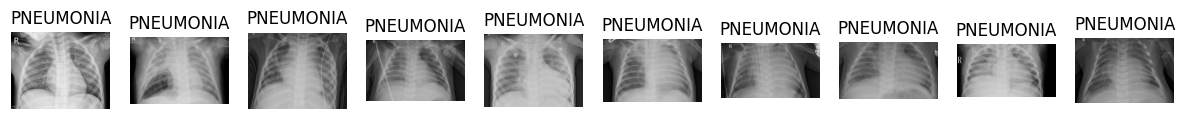

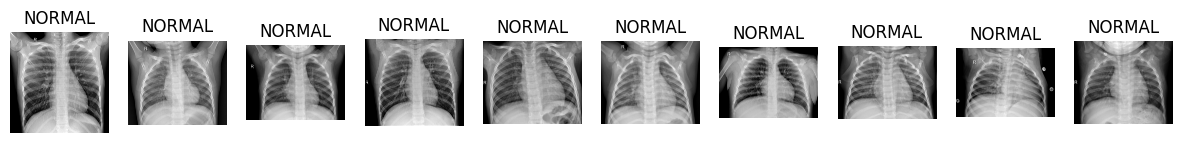

In [13]:
def display_sample_images(category, dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    sample_images = os.listdir(category_dir)[:10]  # Display first 5 images

    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(category_dir, image_name)
        img = Image.open(img_path)
        plt.subplot(1, 10, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
    plt.show()

display_sample_images('PNEUMONIA', train_dir)
display_sample_images('NORMAL', train_dir)







In [14]:
import os
from PIL import Image

def check_image_validation(dataset_dir, subset_dir, categories):
    """
    Check the validity of images in specified categories within a subset directory.

    Parameters:
        dataset_dir (str): The base directory of the dataset.
        subset_dir (str): The subdirectory within the dataset directory to check.
        categories (list): List of categories (e.g., ['normal', 'pneumonia']) to check.

    Returns:
        dict: A dictionary with category names as keys and the count of invalid images as values.
    """
    invalid_image_counts = {category: 0 for category in categories}

    for category in categories:
        category_path = os.path.join(dataset_dir, subset_dir, category)
        if os.path.isdir(category_path):
            image_files = os.listdir(category_path)
            for image_file in image_files:
                image_path = os.path.join(category_path, image_file)
                try:
                    # Open and verify the image
                    img = Image.open(image_path)
                    img.verify()  # Ensure it's an actual image
                    print(f"{image_file}: {img.size} is a valid image in {category}.")
                except (IOError, SyntaxError) as e:
                    # Increment the counter if the image is invalid
                    invalid_image_counts[category] += 1
        else:
            print(f"Directory not found: {category_path}")

    return invalid_image_counts





# Check images in different subsets
train_invalid_count = check_image_validation(base_dir, 'train',['PNEUMONIA','NORMAL'])
test_invalid_count = check_image_validation(base_dir, 'test',['PNEUMONIA','NORMAL'])
val_invalid_count = check_image_validation(base_dir, 'val',['PNEUMONIA','NORMAL'])
# Save the invalid image counts to a file
with open('invalid_image_count.txt', 'w') as f:
    f.write(f"Train set invalid images: {train_invalid_count}\n")
    f.write(f"Test set invalid images: {test_invalid_count}\n")
    f.write(f"Validation set invalid images: {val_invalid_count}\n")

print("Image validation completed. Check 'invalid_image_count.txt' for details.")


Streaming output truncated to the last 5000 lines.
person281_bacteria_1331.jpeg: (1000, 680) is a valid image in PNEUMONIA.
person348_bacteria_1602.jpeg: (1160, 832) is a valid image in PNEUMONIA.
person60_bacteria_285.jpeg: (952, 592) is a valid image in PNEUMONIA.
person441_bacteria_1915.jpeg: (872, 656) is a valid image in PNEUMONIA.
person1321_bacteria_3359.jpeg: (968, 576) is a valid image in PNEUMONIA.
person281_bacteria_1325.jpeg: (920, 632) is a valid image in PNEUMONIA.
person1348_virus_2324.jpeg: (1432, 1008) is a valid image in PNEUMONIA.
person1424_bacteria_3651.jpeg: (1192, 872) is a valid image in PNEUMONIA.
person1589_bacteria_4172.jpeg: (1032, 840) is a valid image in PNEUMONIA.
person1597_bacteria_4191.jpeg: (1544, 1336) is a valid image in PNEUMONIA.
person147_virus_297.jpeg: (1168, 688) is a valid image in PNEUMONIA.
person1287_bacteria_3250.jpeg: (635, 448) is a valid image in PNEUMONIA.
person1284_bacteria_3247.jpeg: (1434, 986) is a valid image in PNEUMONIA.
perso

In [15]:
def write_invalid_image_counts_to_file(invalid_counts, subset_name, output_file='invalid_image_count.txt'):
    """
    Write the invalid image counts to a text file.

    Parameters:
        invalid_counts (dict): A dictionary with category names as keys and the count of invalid images as values.
        subset_name (str): The name of the subset (e.g., 'train', 'test', 'val').
        output_file (str): The file to write the invalid image counts. Default is 'invalid_image_count.txt'.
    """
    with open(output_file, 'a') as f:
        f.write(f"\n--- {subset_name.upper()} SET ---\n")
        for category, count in invalid_counts.items():
            f.write(f"{category} invalid images: {count}\n")

In [16]:
# Write the invalid image counts to a file
write_invalid_image_counts_to_file(train_invalid_count, 'train')
write_invalid_image_counts_to_file(test_invalid_count, 'test')
write_invalid_image_counts_to_file(val_invalid_count, 'val')


In [17]:
# Read the invalid image count from the file
try:
    with open('invalid_image_count.txt', 'r') as f:
        count = f.read().strip()
        print(f"Number of invalid images: {count}")
except FileNotFoundError:
    print("The file containing the invalid image count does not exist.")


Number of invalid images: Train set invalid images: {'PNEUMONIA': 0, 'NORMAL': 0}
Test set invalid images: {'PNEUMONIA': 0, 'NORMAL': 0}
Validation set invalid images: {'PNEUMONIA': 0, 'NORMAL': 0}

--- TRAIN SET ---
PNEUMONIA invalid images: 0
NORMAL invalid images: 0

--- TEST SET ---
PNEUMONIA invalid images: 0
NORMAL invalid images: 0

--- VAL SET ---
PNEUMONIA invalid images: 0
NORMAL invalid images: 0


In [18]:
import os
from PIL import Image

def check_image_resolution(base_dir, subset_dir, category, min_width, min_height):
    """
    Checks if images in a specific subset and category meet the minimum resolution.

    Parameters:
        base_dir (str): The base directory of the dataset.
        subset_dir (str): The subset directory (e.g., 'train', 'test', 'val').
        category (str): The category of the images (e.g., 'NORMAL', 'PNEUMONIA').
        min_width (int): The minimum width threshold.
        min_height (int): The minimum height threshold.

    Returns:
        list: A list of image filenames that do not meet the resolution threshold.
    """
    invalid_images = []
    image_dir = os.path.join(base_dir, subset_dir, category)
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            if width < min_width or height < min_height:
                invalid_images.append(image_file)
        except IOError:
            print(f"Cannot open image: {image_path}")

    return invalid_images

# Set the minimum resolution thresholds
min_width = 224
min_height = 224

# Define the subsets and categories
subsets_categories = [
    (base_dir, 'train', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'test', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'val', ['PNEUMONIA', 'NORMAL'])
]

# Dictionary to store the invalid images for each subset and category
invalid_images_by_subset = {}

# Check images for each combination of subset and categories
for base, subset, categories in subsets_categories:
    invalid_images_by_subset[subset] = {}
    for category in categories:
        invalid_images = check_image_resolution(base, subset, category, min_width, min_height)
        invalid_images_by_subset[subset][category] = invalid_images
        print(f"{subset} - {category}: {len(invalid_images)} images below resolution threshold.")

# Optionally, save the invalid image filenames to a file
output_file = 'invalid_image_count.txt'
with open(output_file, 'w') as f:
    for subset, categories in invalid_images_by_subset.items():
        for category, images in categories.items():
            f.write(f"{subset} - {category}: {len(images)} images below resolution threshold.\n")
            for image in images:
                f.write(f"    {image}\n")

print("Image resolution check completed. ")



train - PNEUMONIA: 41 images below resolution threshold.
train - NORMAL: 0 images below resolution threshold.
test - PNEUMONIA: 0 images below resolution threshold.
test - NORMAL: 0 images below resolution threshold.
val - PNEUMONIA: 0 images below resolution threshold.
val - NORMAL: 0 images below resolution threshold.
Image resolution check completed. 


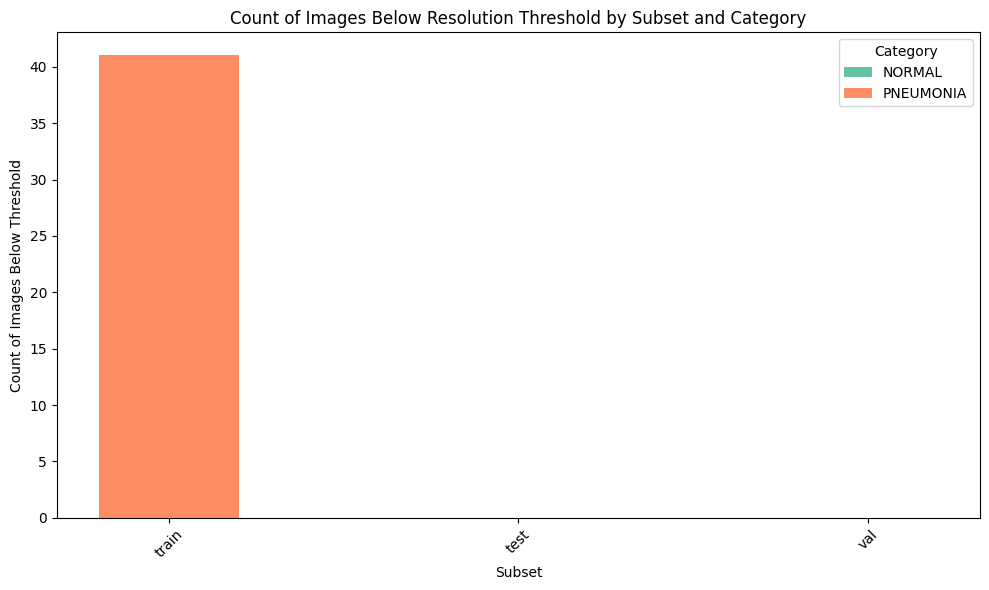

In [19]:
import matplotlib.pyplot as plt

def visualize_invalid_image_resolution(invalid_images_by_subset):
    """
    Visualizes the count of images below the resolution threshold for each subset and category.

    Parameters:
        invalid_images_by_subset (dict): Dictionary with subset names as keys and another dictionary as values,
                                         where the inner dictionary contains category names as keys and lists of
                                         invalid images as values.
    """
    subsets = []
    categories = []
    counts = []

    for subset, category_dict in invalid_images_by_subset.items():
        for category, images in category_dict.items():
            subsets.append(subset)
            categories.append(category)
            counts.append(len(images))

    # Create a bar plot to visualize the results
    fig, ax = plt.subplots(figsize=(10, 6))

    # Use different colors for each category
    unique_categories = set(categories)
    colors = plt.cm.Set2(range(len(unique_categories)))

    for idx, category in enumerate(unique_categories):
        cat_indices = [i for i, cat in enumerate(categories) if cat == category]
        cat_counts = [counts[i] for i in cat_indices]
        cat_subsets = [subsets[i] for i in cat_indices]
        ax.bar(cat_subsets, cat_counts, color=colors[idx], label=category, width=0.4, align='center')

    # Add labels and title
    ax.set_xlabel('Subset')
    ax.set_ylabel('Count of Images Below Threshold')
    ax.set_title('Count of Images Below Resolution Threshold by Subset and Category')
    ax.legend(title='Category')

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the visualization function after the resolution check is completed
visualize_invalid_image_resolution(invalid_images_by_subset)


In [20]:
def enhance_image(image_path, output_path, size):
    """
    Enhance the resolution of an image by resizing.

    Parameters:
        image_path (str): The path to the original image.
        output_path (str): The path to save the enhanced image.
        size (tuple): The new size (width, height) for the image.
    """
    try:
        img = Image.open(image_path)
        img = img.resize(size, Image.LANCZOS)  # Resizing with high-quality resampling filter
        img.save(output_path)
    except IOError:
        print(f"Cannot enhance image: {image_path}")

# Add this code after your existing resolution check

# Define the size to which images should be enhanced
new_size = (min_width, min_height)

# Enhance invalid images
for subset, categories in invalid_images_by_subset.items():
    for category, images in categories.items():
        for image in images:
            image_path = os.path.join(base_dir, subset, category, image)
            output_path = os.path.join(base_dir, subset, category, 'enhanced_' + image)
            enhance_image(image_path, output_path, new_size)

print("Image enhancement completed.")


Image enhancement completed.


In [21]:
def recheck_image_resolution(base_dir, subset_dir, category, min_width, min_height):
    """
    Rechecks if images in a specific subset and category meet the minimum resolution.

    Parameters:
        base_dir (str): The base directory of the dataset.
        subset_dir (str): The subset directory (e.g., 'train', 'test', 'val').
        category (str): The category of the images (e.g., 'NORMAL', 'PNEUMONIA').
        min_width (int): The minimum width threshold.
        min_height (int): The minimum height threshold.

    Returns:
        list: A list of image filenames that do not meet the resolution threshold.
    """
    invalid_images = []
    image_dir = os.path.join(base_dir, subset_dir, category)
    image_files = [f for f in os.listdir(image_dir) if f.startswith('enhanced_') and f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            if width < min_width or height < min_height:
                invalid_images.append(image_file)
        except IOError:
            print(f"Cannot open image: {image_path}")

    return invalid_images

# Add this code after enhancing images

# Dictionary to store the invalid images for each subset and category after enhancement
invalid_images_after_enhancement = {}

# Recheck images for each combination of subset and categories
for base, subset, categories in subsets_categories:
    invalid_images_after_enhancement[subset] = {}
    for category in categories:
        invalid_images = recheck_image_resolution(base, subset, category, min_width, min_height)
        invalid_images_after_enhancement[subset][category] = invalid_images
        print(f"After enhancement - {subset} - {category}: {len(invalid_images)} images below resolution threshold.")

# Optionally, save the invalid image filenames after enhancement to a file
output_file_after_enhancement = 'invalid_image_count_after_enhancement.txt'
with open(output_file_after_enhancement, 'w') as f:
    for subset, categories in invalid_images_after_enhancement.items():
        for category, images in categories.items():
            f.write(f"After enhancement - {subset} - {category}: {len(images)} images below resolution threshold.\n")
            for image in images:
                f.write(f"    {image}\n")

print("Image resolution recheck completed.")


After enhancement - train - PNEUMONIA: 0 images below resolution threshold.
After enhancement - train - NORMAL: 0 images below resolution threshold.
After enhancement - test - PNEUMONIA: 0 images below resolution threshold.
After enhancement - test - NORMAL: 0 images below resolution threshold.
After enhancement - val - PNEUMONIA: 0 images below resolution threshold.
After enhancement - val - NORMAL: 0 images below resolution threshold.
Image resolution recheck completed.


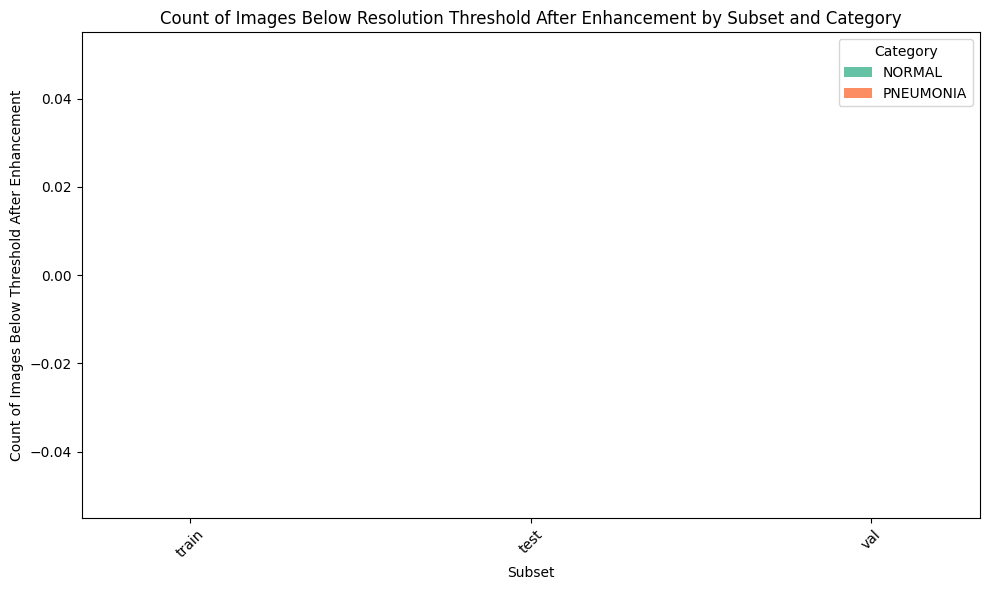

In [22]:
import matplotlib.pyplot as plt

def visualize_invalid_image_resolution_after_enhancement(invalid_images_after_enhancement):
    """
    Visualizes the count of images below the resolution threshold after enhancement for each subset and category.

    Parameters:
        invalid_images_after_enhancement (dict): Dictionary with subset names as keys and another dictionary as values,
                                                 where the inner dictionary contains category names as keys and lists of
                                                 invalid images as values.
    """
    subsets = []
    categories = []
    counts = []

    for subset, category_dict in invalid_images_after_enhancement.items():
        for category, images in category_dict.items():
            subsets.append(subset)
            categories.append(category)
            counts.append(len(images))

    # Create a bar plot to visualize the results
    fig, ax = plt.subplots(figsize=(10, 6))

    # Use different colors for each category
    unique_categories = set(categories)
    colors = plt.cm.Set2(range(len(unique_categories)))

    for idx, category in enumerate(unique_categories):
        cat_indices = [i for i, cat in enumerate(categories) if cat == category]
        cat_counts = [counts[i] for i in cat_indices]
        cat_subsets = [subsets[i] for i in cat_indices]
        ax.bar(cat_subsets, cat_counts, color=colors[idx], label=category, width=0.4, align='center')

    # Add labels and title
    ax.set_xlabel('Subset')
    ax.set_ylabel('Count of Images Below Threshold After Enhancement')
    ax.set_title('Count of Images Below Resolution Threshold After Enhancement by Subset and Category')
    ax.legend(title='Category')

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the visualization function after the resolution recheck is completed
visualize_invalid_image_resolution_after_enhancement(invalid_images_after_enhancement)


In [23]:
import os
from PIL import Image

def check_color_mode(image_path, expected_mode):
    """
    Checks if an image has the expected color mode.

    Parameters:
        image_path (str): The path to the image file.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        bool: True if the image has the expected mode, False otherwise.
    """
    try:
        img = Image.open(image_path)
        return img.mode == expected_mode
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return False

def check_color_mode_in_dataset(base_dir, subset_dir, categories, expected_mode):
    """
    Checks images in different categories within a subset for the expected color mode.

    Parameters:
        base_dir (str): The base directory of the dataset.
        subset_dir (str): The subset directory (e.g., 'train', 'test', 'val').
        categories (list): List of categories (e.g., ['NORMAL', 'PNEUMONIA']) to check.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        dict: A dictionary with category names as keys and a list of filenames that do not match the expected mode.
    """
    incorrect_mode_images = {category: [] for category in categories}

    for category in categories:
        image_dir = os.path.join(base_dir, subset_dir, category)
        image_files = [img for img in os.listdir(image_dir) if img.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

        for img in image_files:
            image_path = os.path.join(image_dir, img)
            if not check_color_mode(image_path, expected_mode):
                incorrect_mode_images[category].append(img)

    return incorrect_mode_images

# Set the expected color mode
expected_mode = 'L'  # 'L' is the mode for grayscale images in Python

# Define the subsets and categories
subsets_categories = [
    (base_dir, 'train', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'test', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'val', ['PNEUMONIA', 'NORMAL'])
]

# Dictionary to store the results
incorrect_mode_images_by_subset = {}

# Check images in all subsets and categories
for base, subset, categories in subsets_categories:
    incorrect_mode_images_by_subset[subset] = check_color_mode_in_dataset(base, subset, categories, expected_mode)

# Print the results
for subset, category_dict in incorrect_mode_images_by_subset.items():
    for category, images in category_dict.items():
        print(f"{subset} - {category}: {len(images)} images with incorrect color mode.")
        if images:
            print(f"  Images: {', '.join(images)}")

# Optionally, save the results to a file
output_file = 'incorrect_color_mode_images.txt'
with open(output_file, 'w') as f:
    for subset, category_dict in incorrect_mode_images_by_subset.items():
        for category, images in category_dict.items():
            f.write(f"{subset} - {category}: {len(images)} images with incorrect color mode.\n")
            for img in images:
                f.write(f"    {img}\n")

print("Color mode check completed. ")


train - PNEUMONIA: 324 images with incorrect color mode.
  Images: person746_virus_1369.jpeg, person963_virus_1636.jpeg, person1263_bacteria_3221.jpeg, person913_bacteria_2838.jpeg, person347_bacteria_1599.jpeg, enhanced_person1706_bacteria_4516.jpeg, person355_virus_731.jpeg, person920_virus_1577.jpeg, person414_virus_845.jpeg, person909_virus_1565.jpeg, person1728_bacteria_4555.jpeg, person441_virus_897.jpeg, enhanced_person1728_bacteria_4556.jpeg, person1684_bacteria_4462.jpeg, person1644_bacteria_4361.jpeg, person1684_bacteria_4461.jpeg, person433_virus_882.jpeg, person1104_virus_1826.jpeg, person291_virus_596.jpeg, person1168_virus_1965.jpeg, person348_virus_715.jpeg, enhanced_person309_virus_631.jpeg, person1719_bacteria_4542.jpeg, enhanced_person1719_bacteria_4544.jpeg, person1689_bacteria_4474.jpeg, person354_bacteria_1635.jpeg, person407_virus_811.jpeg, person980_virus_1655.jpeg, person934_virus_1595.jpeg, person565_bacteria_2348.jpeg, person621_virus_1194.jpeg, person342_viru

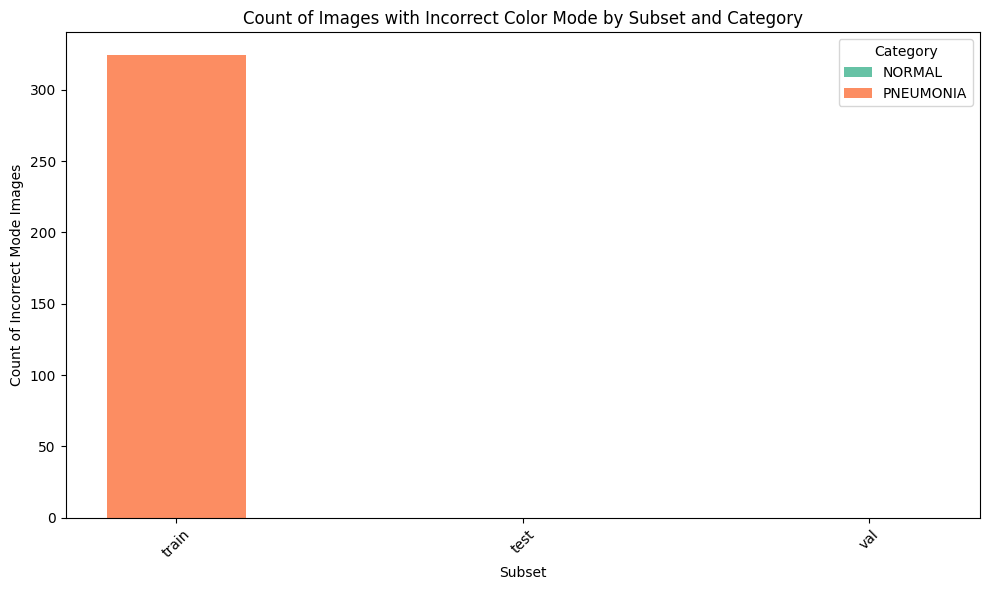

In [24]:
import matplotlib.pyplot as plt

def visualize_incorrect_mode_images(incorrect_mode_images_by_subset):
    """
    Visualizes the count of incorrect mode images for each subset and category.

    Parameters:
        incorrect_mode_images_by_subset (dict): Dictionary with subset names as keys and another dictionary as values,
                                                where the inner dictionary contains category names as keys and lists of
                                                incorrect mode images as values.
    """
    subsets = []
    categories = []
    counts = []

    for subset, category_dict in incorrect_mode_images_by_subset.items():
        for category, images in category_dict.items():
            subsets.append(subset)
            categories.append(category)
            counts.append(len(images))

    # Create a bar plot to visualize the results
    fig, ax = plt.subplots(figsize=(10, 6))

    # Use different colors for each category
    unique_categories = set(categories)
    colors = plt.cm.Set2(range(len(unique_categories)))

    for idx, category in enumerate(unique_categories):
        cat_indices = [i for i, cat in enumerate(categories) if cat == category]
        cat_counts = [counts[i] for i in cat_indices]
        cat_subsets = [subsets[i] for i in cat_indices]
        ax.bar(cat_subsets, cat_counts, color=colors[idx], label=category, width=0.4, align='center')

    # Add labels and title
    ax.set_xlabel('Subset')
    ax.set_ylabel('Count of Incorrect Mode Images')
    ax.set_title('Count of Images with Incorrect Color Mode by Subset and Category')
    ax.legend(title='Category')

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the visualization function
visualize_incorrect_mode_images(incorrect_mode_images_by_subset)


In [25]:
import os
from PIL import Image

def check_and_convert_color_mode(image_path, expected_mode):
    """
    Checks if an image has the expected color mode and converts it if necessary.

    Parameters:
        image_path (str): The path to the image file.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        bool: True if the image was successfully checked and converted (if necessary), False otherwise.
    """
    try:
        img = Image.open(image_path)
        if img.mode != expected_mode:
            print(f"Converting {image_path} from {img.mode} to {expected_mode}")
            img = img.convert(expected_mode)
            img.save(image_path)  # Save the image after conversion
        return img.mode == expected_mode
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return False

def check_and_convert_color_mode_in_dataset(base_dir, subset_dir, categories, expected_mode):
    """
    Checks and converts images in different categories within a subset for the expected color mode.

    Parameters:
        base_dir (str): The base directory of the dataset.
        subset_dir (str): The subset directory (e.g., 'train', 'test', 'val').
        categories (list): List of categories (e.g., ['NORMAL', 'PNEUMONIA']) to check and convert.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        dict: A dictionary with category names as keys and a list of filenames that were converted.
    """
    converted_images = {category: [] for category in categories}

    for category in categories:
        image_dir = os.path.join(base_dir, subset_dir, category)
        image_files = [img for img in os.listdir(image_dir) if img.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

        for img in image_files:
            image_path = os.path.join(image_dir, img)
            if not check_and_convert_color_mode(image_path, expected_mode):
                converted_images[category].append(img)

    return converted_images

# Set the expected color mode
expected_mode = 'L'  # 'L' is the mode for grayscale images in Python


subsets_categories = [
    ('train', ['PNEUMONIA', 'NORMAL']),
    ('test', ['PNEUMONIA', 'NORMAL']),
    ('val', ['PNEUMONIA', 'NORMAL'])
]

# Dictionary to store the results
converted_images_by_subset = {}

# Check and convert images in all subsets and categories
for subset, categories in subsets_categories:
    converted_images_by_subset[subset] = check_and_convert_color_mode_in_dataset(base_dir, subset, categories, expected_mode)

# Print the results
for subset, category_dict in converted_images_by_subset.items():
    for category, images in category_dict.items():
        print(f"{subset} - {category}: {len(images)} images were converted to the correct color mode.")
        if images:
            print(f"  Converted Images: {', '.join(images)}")

# Optionally, save the results to a file
output_file = 'converted_color_mode_images.txt'
with open(output_file, 'w') as f:
    for subset, category_dict in converted_images_by_subset.items():
        for category, images in category_dict.items():
            f.write(f"{subset} - {category}: {len(images)} images were converted to the correct color mode.\n")
            for img in images:
                f.write(f"    {img}\n")

print("Color mode check and conversion completed.")


Converting chest_xray/train/PNEUMONIA/person746_virus_1369.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person963_virus_1636.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person1263_bacteria_3221.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person913_bacteria_2838.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person347_bacteria_1599.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/enhanced_person1706_bacteria_4516.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person355_virus_731.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person920_virus_1577.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person414_virus_845.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person909_virus_1565.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person1728_bacteria_4555.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/person441_virus_897.jpeg from RGB to L
Converting chest_xray/train/PNEUMONIA/en

In [27]:
def recheck_color_mode(image_path, expected_mode):



SyntaxError: incomplete input (<ipython-input-27-f324f76c679d>, line 2)

In [31]:
import os
from PIL import Image

def recheck_color_mode(image_path, expected_mode):
    """
    Checks if an image has the expected color mode.

    Parameters:
        image_path (str): The path to the image file.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        bool: True if the image has the expected mode, False otherwise.
    """
    try:
        img = Image.open(image_path)
        return img.mode == expected_mode
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return False

def recheck_color_mode_in_dataset(base_dir, subset_dir, categories, expected_mode):
    """
    Checks images in different categories within a subset for the expected color mode.

    Parameters:
        base_dir (str): The base directory of the dataset.
        subset_dir (str): The subset directory (e.g., 'train', 'test', 'val').
        categories (list): List of categories (e.g., ['NORMAL', 'PNEUMONIA']) to check.
        expected_mode (str): The expected color mode (e.g., 'L' for grayscale).

    Returns:
        dict: A dictionary with category names as keys and a list of filenames that do not match the expected mode.
    """
    incorrect_mode_images = {category: [] for category in categories}

    for category in categories:
        image_dir = os.path.join(base_dir, subset_dir, category)
        image_files = [img for img in os.listdir(image_dir) if img.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

        for img in image_files:
            image_path = os.path.join(image_dir, img)
            if not recheck_color_mode(image_path, expected_mode):
                incorrect_mode_images[category].append(img)

    return incorrect_mode_images

# Set the expected color mode
expected_mode = 'L'  # 'L' is the mode for grayscale images in Python

# Define the subsets and categories
subsets_categories = [
    (base_dir, 'train', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'test', ['PNEUMONIA', 'NORMAL']),
    (base_dir, 'val', ['PNEUMONIA', 'NORMAL'])
]

# Dictionary to store the results
incorrect_mode_images_by_subset = {}

# reCheck images in all subsets and categories
for base, subset, categories in subsets_categories:
    incorrect_mode_images_by_subset[subset] = recheck_color_mode_in_dataset(base, subset, categories, expected_mode)

# Print the results
for subset, category_dict in incorrect_mode_images_by_subset.items():
    for category, images in category_dict.items():
        print(f"{subset} - {category}: {len(images)} images with incorrect color mode.")
        if images:
            print(f"  Images: {', '.join(images)}")

# Optionally, save the results to a file
output_file = 'incorrect_color_mode_images.txt'
with open(output_file, 'w') as f:
    for subset, category_dict in incorrect_mode_images_by_subset.items():
        for category, images in category_dict.items():
            f.write(f"{subset} - {category}: {len(images)} images with incorrect color mode.\n")
            for img in images:
                f.write(f"    {img}\n")

print("Color mode recheck completed. ")


train - PNEUMONIA: 0 images with incorrect color mode.
train - NORMAL: 0 images with incorrect color mode.
test - PNEUMONIA: 0 images with incorrect color mode.
test - NORMAL: 0 images with incorrect color mode.
val - PNEUMONIA: 0 images with incorrect color mode.
val - NORMAL: 0 images with incorrect color mode.
Color mode recheck completed. 


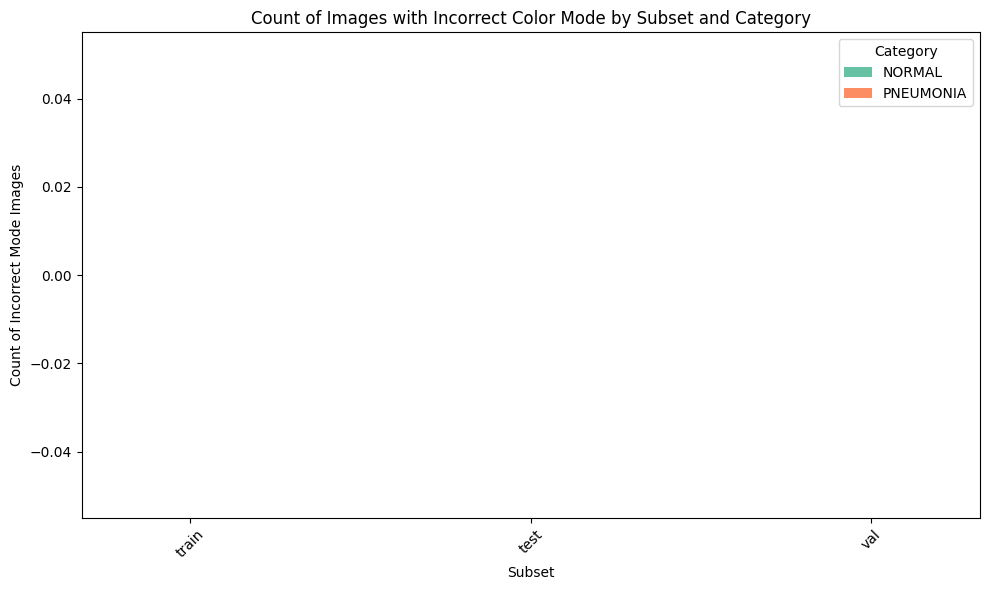

In [30]:
import matplotlib.pyplot as plt

def visualize_incorrect_mode_images(incorrect_mode_images_by_subset):
    """
    Visualizes the count of incorrect mode images for each subset and category.

    Parameters:
        incorrect_mode_images_by_subset (dict): Dictionary with subset names as keys and another dictionary as values,
                                                where the inner dictionary contains category names as keys and lists of
                                                incorrect mode images as values.
    """
    subsets = []
    categories = []
    counts = []

    for subset, category_dict in incorrect_mode_images_by_subset.items():
        for category, images in category_dict.items():
            subsets.append(subset)
            categories.append(category)
            counts.append(len(images))

    # Create a bar plot to visualize the results
    fig, ax = plt.subplots(figsize=(10, 6))

    # Use different colors for each category
    unique_categories = set(categories)
    colors = plt.cm.Set2(range(len(unique_categories)))

    for idx, category in enumerate(unique_categories):
        cat_indices = [i for i, cat in enumerate(categories) if cat == category]
        cat_counts = [counts[i] for i in cat_indices]
        cat_subsets = [subsets[i] for i in cat_indices]
        ax.bar(cat_subsets, cat_counts, color=colors[idx], label=category, width=0.4, align='center')

    # Add labels and title
    ax.set_xlabel('Subset')
    ax.set_ylabel('Count of Incorrect Mode Images')
    ax.set_title('Count of Images with Incorrect Color Mode by Subset and Category')
    ax.legend(title='Category')

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the visualization function
visualize_incorrect_mode_images(incorrect_mode_images_by_subset)
